In [1]:
import pandas as pd

data = pd.read_csv("xy_data.csv")
print(data.head())     
print(data.info())     


            x          y
0   88.364456  57.784378
1   74.283936  54.406780
2   60.256474  46.311462
3   82.134370  57.717567
4  101.036390  67.849340
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1500 non-null   float64
 1   y       1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
None


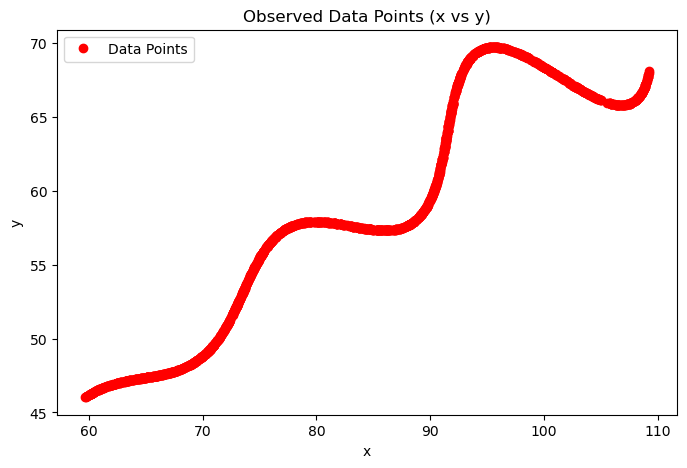

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(data['x'], data['y'], 'ro', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data Points (x vs y)')
plt.legend()
plt.show()


In [3]:
import numpy as np

# Model: t, theta (rad), M, X
def model(t, theta, M, X):
    x_pred = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y_pred = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x_pred, y_pred


In [4]:
def l1_loss(params, t, x_obs, y_obs):
    theta, M, X = params
    x_pred, y_pred = model(t, theta, M, X)
    return np.mean(np.abs(x_obs - x_pred) + np.abs(y_obs - y_pred))


In [6]:
n_points = len(data)                      
t_vals = np.linspace(6, 60, n_points)   
x_obs = data['x'].values
y_obs = data['y'].values


In [9]:
from scipy.optimize import minimize

n_points = len(data)                      
t_vals = np.linspace(6, 60, n_points)   
x_obs = data['x'].values
y_obs = data['y'].values

bounds = [
    (np.deg2rad(0.01), np.deg2rad(50)), # theta [rad]
    (-0.05, 0.05),                      # M
    (0, 100)                            # X
]
initial_guess = [np.deg2rad(25), 0.0, 50.0]

result = minimize(
    l1_loss,
    initial_guess,
    args=(t_vals, x_obs, y_obs),
    bounds=bounds,
    method='L-BFGS-B'
)
theta_best, M_best, X_best = result.x
print("Theta (degrees):", np.rad2deg(theta_best))
print("M:", M_best)
print("X:", X_best)
print("Final L1 Loss:", result.fun)


Theta (degrees): 28.118497154290655
M: 0.021389363234710853
X: 54.900431938998906
Final L1 Loss: 25.2433959690557


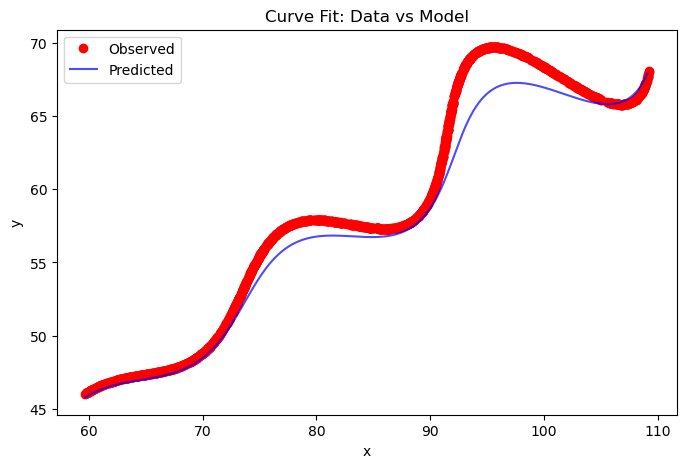

In [10]:
x_pred, y_pred = model(t_vals, theta_best, M_best, X_best)

plt.figure(figsize=(8,5))
plt.plot(x_obs, y_obs, 'ro', label='Observed')
plt.plot(x_pred, y_pred, 'b-', label='Predicted', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fit: Data vs Model')
plt.legend()
plt.show()


In [11]:
from numpy import sin, cos, exp

theta_deg = np.rad2deg(theta_best)
equation_x = f"x = t*cos({theta_deg:.4f} deg) - exp({M_best:.4f}*|t|)*sin(0.3t)*sin({theta_deg:.4f} deg) + {X_best:.4f}"
equation_y = f"y = 42 + t*sin({theta_deg:.4f} deg) + exp({M_best:.4f}*|t|)*sin(0.3t)*cos({theta_deg:.4f} deg)"
print("Final Parametric Equations:")
print(equation_x)
print(equation_y)


Final Parametric Equations:
x = t*cos(28.1185 deg) - exp(0.0214*|t|)*sin(0.3t)*sin(28.1185 deg) + 54.9004
y = 42 + t*sin(28.1185 deg) + exp(0.0214*|t|)*sin(0.3t)*cos(28.1185 deg)
